In [2]:
# Enter your name here: Dhruv Arora

In [3]:
# Standard Headers
# You may add additional headers here if needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'1.5.3'

# Assignment 1: Data Preprocessing

## Part 1: Data Cleaning, Exploration, and Feature Engineering

For this part of the assignment you'll be using the 1994 Adult Census Income dataset (`adult.csv`) collected by Ronny Kohavi and Barry Becker. It contains 32,561 records with 14 features.

Q1. Read the dataset from `adult.csv` into a Pandas dataframe. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

**Important:**
* Notice in the csv file that `?` is used to indicate missing values. We want all of the missing values to be represented by NaNs in the dataframe. Make sure that all of the `?` are converted to `NaN` in your dataframe!
* Also, set the `skipinitialspace` parameter to `True`. (This will be necessary for the `map()` function to work later in the assignment.)

In [4]:
# your code goes here
adult_data = pd.read_csv('adult.csv', na_values=['?'], skipinitialspace=True)
adult_data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,NaN,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,54.0,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40.0,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22.0,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Q2. Start by looking for missing values. How many missing values are there in this dataset?

In [5]:
# your code goes here
print('Total missing values: %d' % adult_data.isnull().sum().sum())

Total missing values: 4290


Q3. Clean up some of the missing values. 
* Drop all of the records from the dataset that are missing `workclass` or `occupation`.
* For records missing values in `native-country`, impute those by using a "forward fill." This will fill in the missing value with the same value as the previous record. 
* For records missing `age`, leave those as-is for now. We will do a similar-case imputation on them later! 

Print something to show that there are no longer missing values in `workclass`, `occupation`, or `native-country`.

In [6]:
# impute
adult_data.loc[:,'native-country'].fillna(method='ffill', inplace=True)
# drop
adult_data.dropna(subset=['workclass', 'occupation'], inplace=True)

# show results
print('Missing Value Counts:')
print(adult_data.isnull().sum())

Missing Value Counts:
age               28
workclass          0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


Q4. Explore the data:
* How is the dataset distributed between people who make <=50K income and those who make >50K income? 
* How is the dataset distributed between males & females?
* Create a plot to show the distribution of the datset by `education`.
* Create a plot to show the distribution of the ages in the dataset.

<Axes: title={'center': 'Income Distribution'}>

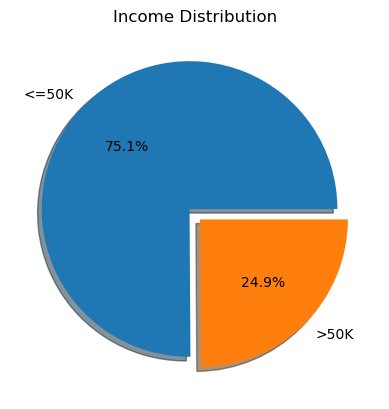

In [7]:
income = adult_data['income'].value_counts()
income.plot(kind='pie', title='Income Distribution', explode=(0.05, 0.05),
            shadow=True, autopct='%1.1f%%', ylabel='')

Q5. Create a plot to determine if there are any outliers in the  `capital-gain` column.  
Answer as a comment: What values would you consider to be outliers in this column? Explain why.

Total # of outliers: 160
Specific outlier counts:
value	count
99999    155
34095      3
41310      2
Name: capital-gain, dtype: int64


<Axes: >

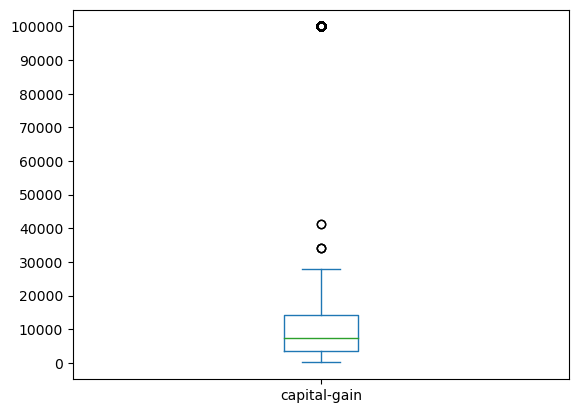

In [8]:
# I would consider all of the values above about 30,000 to be outliers since
# they are above the top whisker (IQR * 1.5) and outside of the graph
print('Total # of outliers: %d' % adult_data[adult_data['capital-gain'] > 30_000]['capital-gain'].count())
print('Specific outlier counts:')
print('value\tcount')
print(adult_data[adult_data['capital-gain'] > 30_000]['capital-gain'].value_counts())
adult_data[adult_data['capital-gain'] > 0].loc[:,'capital-gain'].plot(kind='box', yticks=range(0,100001,10000))

Q6. Using the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), group the data by  `marital-status`. 

Display each marital status along with it's mean age, in sorted order from least to greatest.

In [9]:
# your code goes here
grouped_marital = adult_data.groupby('marital-status').describe()
grouped_marital['age'].loc[:,'mean'].sort_values()

marital-status
Never-married            28.471218
Married-AF-spouse        31.250000
Separated                39.507821
Married-spouse-absent    40.290488
Married-civ-spouse       42.770487
Divorced                 42.896333
Widowed                  57.742857
Name: mean, dtype: float64

Q7. Now fill in those missing age values, using similar case imputation. For each missing age, fill it in with the **median** age of that person's marital-status category. Use **median** rather than mean for this, so that we only use whole numbers for ages. Display the head of the dataframe.

In [10]:
medians = adult_data.groupby('marital-status')['age'].transform('median')
adult_data.loc[:,'age'].fillna(medians, inplace=True)

adult_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,42.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Q8. Display everyone who is over 90 years old.  

In [11]:
adult_data[adult_data['age'] > 90]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
222,91.0,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
5272,94.0,Private,High-school,5,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
32277,91.0,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,93.0,Local-gov,Elem-school,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K


Q9. Create a scatter plot between `age` and `hours-per-week` **for only the first 100 datapoints in the dataset.**  
Place `age` on the X axis. Color each datapoint according to their income - one color for those that make <=50K, and another color for those that make >50K.

Answer as a comment: What observations or insights can you make by looking at this plot?

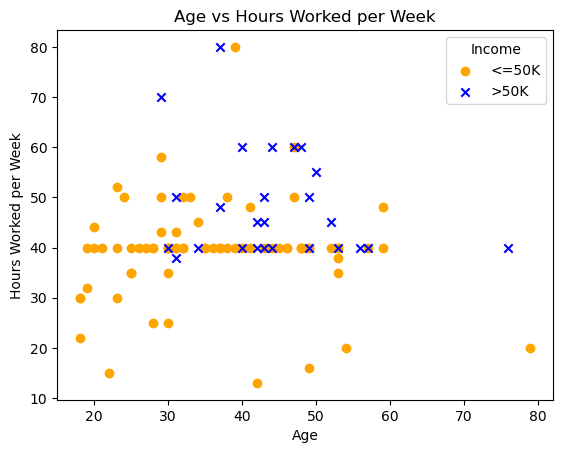

In [12]:
subset = adult_data.head(100)
below_data = subset[subset['income'] == '<=50K']
above_data = subset[subset['income'] == '>50K']

# scatter <= 50K
below_graph = plt.scatter(
    x=below_data['age'],
    y=below_data['hours-per-week'],
    c='orange',
    marker='o',
    label='<=50K'
)

# scatter >50K
above_graph = plt.scatter( 
    x=above_data['age'],
    y=above_data['hours-per-week'],
    c='blue',
    marker='x',
    label='>50K'
)

# make it look pretty
plt.title('Age vs Hours Worked per Week')
plt.xlabel('Age')
plt.ylabel('Hours Worked per Week')
plt.legend(handles=[below_graph, above_graph], title='Income')

plt.show()

# this graph shows us that people who make >50K work 40+ hours a week
# however working 40+ hours does not automatically guarantee >50K
# we also see that the ratio of people making >50K at each age
# increases as they get older

Q10. Feature engineering: Using the dictionary provided below, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for Series [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [13]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Asia',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
}

In [14]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
data_copy = adult_data.copy()

# add the new column to data_copy
data_copy['continent'] = data_copy.loc[:,'native-country'].map(lambda x: continent_dict[x])

data_copy.head()

adult_data = data_copy

Q11. Plot a bar graph showing the average age of adults from each continent, and show the standard deviations on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen5.png" width=200>

<Axes: title={'center': 'Average Age per Continent'}, xlabel='Continent', ylabel='Average Age'>

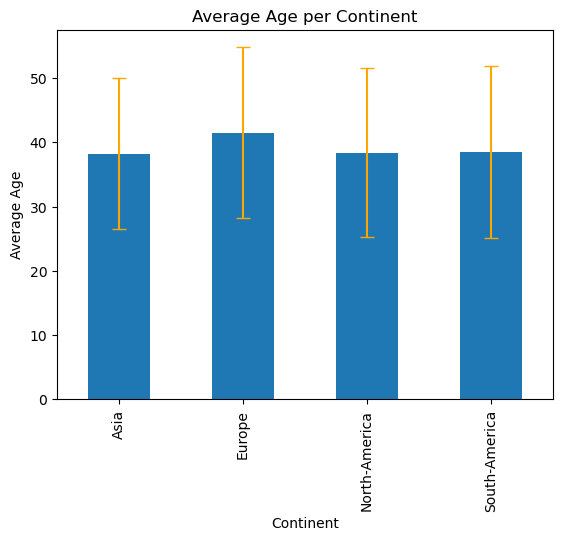

In [15]:
continent_groups = adult_data.groupby('continent').describe()
continent_groups['age'].plot(
    kind='bar',
    y='mean',
    yerr='std',
    capsize=5,
    ecolor='orange',
    title='Average Age per Continent',
    xlabel='Continent',
    ylabel='Average Age',
    legend=False
)

Q12. To reduce the dimensionality of this dataset via feature selection, which attribute or attributes would you eliminate? Explain why as a comment.

In [16]:
'''Explain here (as a comment):
    capital-gain and loss could be combined into a single positive/negative value instead
        of storing them both separately
    education and education-num could also be combined into a singular value
        since they describe essentially the same information
    native-country and continent are also redundant, we can just keep country
        since we can still derive the continent from it later
'''

'Explain here (as a comment):\n    capital-gain and loss could be combined into a single positive/negative value instead\n        of storing them both separately\n    education and education-num could also be combined into a singular value\n        since they describe essentially the same information\n    native-country and continent are also redundant, we can just keep country\n        since we can still derive the continent from it later\n'

## Part 2: Data Scaling and Dimensionality Reduction

For this part you'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

<img src="imgs/screen4.png">

Q13. Read the dataset from `leaf.csv` into a dataframe. Display the head of the dataframe.

In [17]:
leaf_data = pd.read_csv('leaf.csv')
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q14. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. As a comment, explain how you would handle these missing values, then go ahead and handle them (in code). Display the resulting head of the dataframe.

In [18]:
# Since the standard deviation is relatively small, this means that imputing
# based on the mean is an acceptable method of fixing this.
# Since eccentricity can be a decimal value, we can use mean without issues

means = leaf_data.groupby('class')['eccentricity'].transform('mean')
leaf_data['eccentricity'].fillna(means, inplace=True)
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.415627,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q15. Data scaling: Standardize the features in the `leaf_data` dataset so that all of the features are on the same scale.

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [19]:
scaled = pd.DataFrame(StandardScaler().fit_transform(leaf_data), columns=leaf_data.columns)
leaf_data = scaled

leaf_data.describe()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
count,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01
mean,-4.483593e-17,-1.211638e-16,-5.337611e-18,3.095814e-16,7.301851e-16,5.316260e-16,1.313052e-16,1.558582e-16,1.067522e-16,-2.049643e-16,-4.611696e-16,4.270089e-17,-1.195625e-16,3.416071e-17,-3.416071e-17
std,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00
min,-1.196975e+00,-1.796617e+00,-5.311962e-01,-1.294052e+00,-1.709808e+00,-2.374230e+00,-1.161357e+00,-9.163208e-01,-7.173453e-01,-9.897725e-01,-1.465899e+00,-1.033102e+00,-1.181420e+00,-7.477159e-01,-1.328653e+00
25%,-1.196975e+00,-6.564680e-01,-5.107431e-01,-9.828770e-01,-1.290670e+00,-7.003265e-01,-8.955253e-01,-7.309311e-01,-6.866341e-01,-5.801078e-01,-6.958099e-01,-6.512935e-01,-7.285392e-01,-5.740442e-01,-6.164975e-01
50%,-3.077935e-01,-2.217809e-01,-4.919593e-01,2.954545e-01,6.051952e-01,6.388299e-01,-6.918154e-01,-5.936111e-01,-6.488859e-01,-3.477442e-01,-3.008438e-01,-3.836834e-01,-3.575189e-01,-4.664657e-01,-3.267214e-01
75%,5.813877e-01,3.217980e-01,-4.338434e-01,6.191808e-01,7.184381e-01,6.955393e-01,9.908940e-01,1.282551e+00,1.146930e+00,3.202602e-01,6.347915e-01,4.391088e-01,3.537397e-01,1.671184e-02,4.204347e-01
max,1.470569e+00,1.729312e+00,3.277599e+00,1.575176e+00,8.818000e-01,7.252251e-01,1.659464e+00,1.949107e+00,2.358346e+00,3.465257e+00,2.817219e+00,3.325973e+00,2.870640e+00,3.575237e+00,3.183163e+00


Q16. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensions are necessary to retain 95% of the variance. 
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform). 
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [20]:
pca_data = pd.DataFrame(PCA(0.95, svd_solver='full').fit_transform(leaf_data))

pca_data.head()

,0,1,2,3
0,-1.829002,-1.888197,0.022065,0.091680
1,-1.376523,3.246110,-1.221339,-0.238521
2,2.412789,-0.210715,0.507290,1.111356
3,-2.648967,-2.455226,-0.458040,-0.219275
4,4.910001,-1.109855,-1.218397,-0.154251
